In [1]:
## Importing data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
facebook = pd.read_csv('facebook_ads_data (2.0).csv')
facebook.sample(5)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
598,2021-09-24,Electronics,140.48,8852,110,178.62,1.28,15.87,0.012427,1.271498
294,2021-12-25,Wholesale,58.88,16966,45,63.82,1.31,3.47,0.002652,1.083899
324,2021-12-14,Lookalike,410.41,94799,1468,636.29,0.28,4.33,0.015485,1.550376
1332,2021-04-30,Electronics,34.96,49608,257,41.05,0.14,0.70,0.005181,1.174199
1209,2021-06-08,New items,29.74,13219,233,32.14,0.13,2.25,0.017626,1.080699


In [3]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [36]:
## Changing ad_date column to datetime dtype anad filter 2021 data
facebook['ad_date'] = pd.to_datetime(facebook['ad_date'])
facebook_2021 = facebook[facebook['ad_date'].dt.year == 2021]

In [38]:
## Group ad_date with the sum of total spendings on marketing
facebook_spend_2021 = facebook_2021.groupby(['ad_date'], as_index = False)['total_spend'].sum()
facebook_spend_2021

,ad_date,total_spend
0,2021-01-01,0.39
1,2021-01-02,7.74
2,2021-01-04,70.06
3,2021-01-05,81.15
4,2021-01-06,142.77
...,...,...
324,2021-12-27,478.31
325,2021-12-28,359.83
326,2021-12-29,163.25
327,2021-12-30,285.67


<Axes: xlabel='ad_date'>

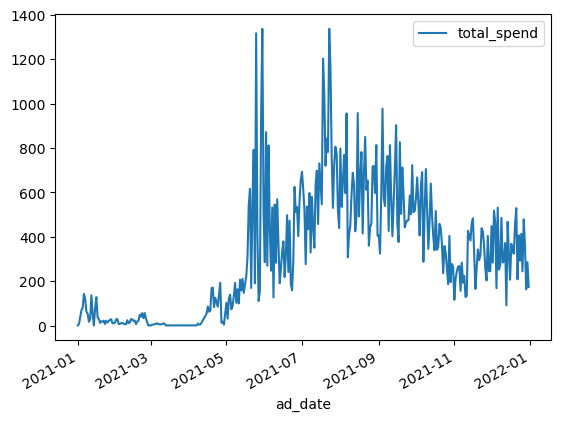

In [40]:
facebook_spend_2021.plot(x = 'ad_date', y = 'total_spend', kind = 'line')

In [42]:
## Group ad_date with the average romi
facebook_romi_2021 = facebook_2021.groupby(['ad_date'], as_index = False)['romi'].mean()
facebook_romi_2021

,ad_date,romi
0,2021-01-01,1.512821
1,2021-01-02,0.891473
2,2021-01-04,0.977305
3,2021-01-05,0.760074
4,2021-01-06,1.011212
...,...,...
324,2021-12-27,1.412261
325,2021-12-28,1.392740
326,2021-12-29,1.263469
327,2021-12-30,1.320858


<Axes: xlabel='ad_date'>

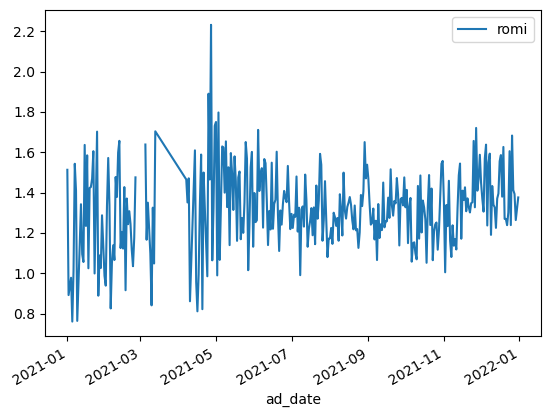

In [44]:
facebook_romi_2021.plot(x = 'ad_date', y = 'romi', kind = 'line')

## Option #2

In [46]:
## Grouping the whole dataframe
grouped_facebook_2021 = facebook_2021.groupby(['ad_date'], as_index = False).agg(
    {'total_spend' :'sum',
     'total_impressions':'sum',
     'total_clicks' :'sum',
     'total_value':'sum',
     'cpm':'mean',
     'cpc' : 'mean',
     'ctr' : 'mean',
     'romi' : 'mean'})

grouped_facebook_2021                                                        

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpm,cpc,ctr,romi
0,2021-01-01,0.39,353,0,0.59,1.100000,NaN,0.000000,1.512821
1,2021-01-02,7.74,10709,205,6.90,0.720000,0.040000,0.019143,0.891473
2,2021-01-04,70.06,22440,1256,68.47,3.120000,0.060000,0.055971,0.977305
3,2021-01-05,81.15,60232,1379,61.68,1.350000,0.060000,0.022895,0.760074
4,2021-01-06,142.77,65265,431,145.97,1.385000,0.330000,0.003308,1.011212
...,...,...,...,...,...,...,...,...,...
324,2021-12-27,478.31,103725,504,686.47,3.103333,0.670000,0.007334,1.412261
325,2021-12-28,359.83,101788,499,450.47,2.943333,0.733333,0.004010,1.392740
326,2021-12-29,163.25,32290,435,171.76,4.653333,0.553333,0.013480,1.263469
327,2021-12-30,285.67,64171,984,330.26,3.713333,0.566667,0.009798,1.320858


<Axes: xlabel='ad_date'>

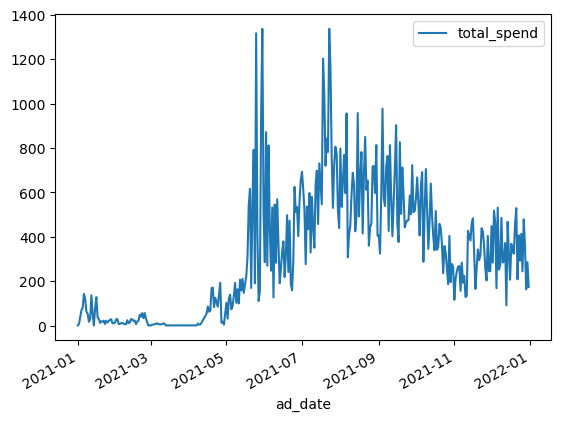

In [48]:
grouped_facebook_2021.plot(x = 'ad_date', y = 'total_spend', kind = 'line')

<Axes: xlabel='ad_date'>

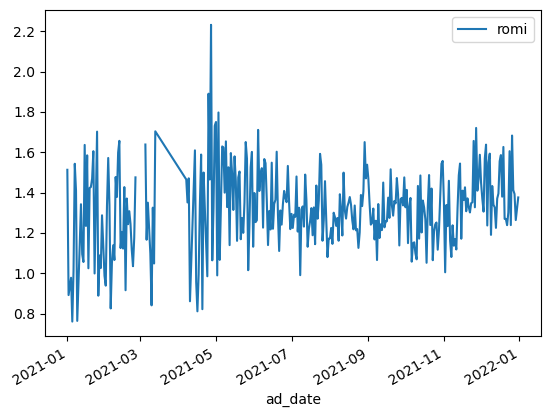

In [50]:
grouped_facebook_2021.plot(x = 'ad_date', y = 'romi', kind = 'line')